In [493]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable

# What External Factors have influenced COVID-19 outbreaks?

On 30 January 2020, SARS‑CoV‑2 also known as COVID-19 was designated a Public Health Emergency of International Concern by the World Health Organization (WHO), and on 11 March 2020 the WHO declared it a pandemic. Since then, the human cost of coronavirus has continued to mount, with more than 142.1 million cases confirmed globally in more than 200 countries and more than 3 million people known to have died as of April 2021. 
This Data-driven Blog aims at highlighting some of the main factors that played a big role in the spread and mortality rate of COVID-19 by providing visual representations that might help us better understand the reasons for discrepancies in countries Coronavirus-related statistics. 

Firstly, we examine how many COVID-19 cases have been reported and what is their distribution in the world as of April 2021. Typically, for a case to be confirmed, a person must have a positive result from laboratory tests. This is true regardless of whether they have shown symptoms of COVID-19 or not. This means that the number of confirmed cases is lower than the number of probable cases, which is in turn lower than the number of suspected cases.

In [494]:
gdf = gpd.read_file('/Users/adrianogiunta/Desktop/Data Science in Economics/Project Info and Data-20210329/data/110m_cultural/ne_110m_admin_0_countries.shp')[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159])
gdf['country_code'] = gdf['country_code'].replace('SDS','SSD')

covid = pd.read_csv("/Users/adrianogiunta/Desktop/Data Science in Economics/Project Info and Data-20210329/data/owid-covid-data1.csv")
tot_cases = covid[['iso_code','total_cases_per_million']].groupby('iso_code').max()
tot_cases_map = gdf.merge(tot_cases, left_on = 'country_code', right_on = 'iso_code')
tot_cases_map.head()

,country,country_code,geometry,total_cases_per_million
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",80.317
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",8.521
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",30194.114
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",95884.321
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",18328.027


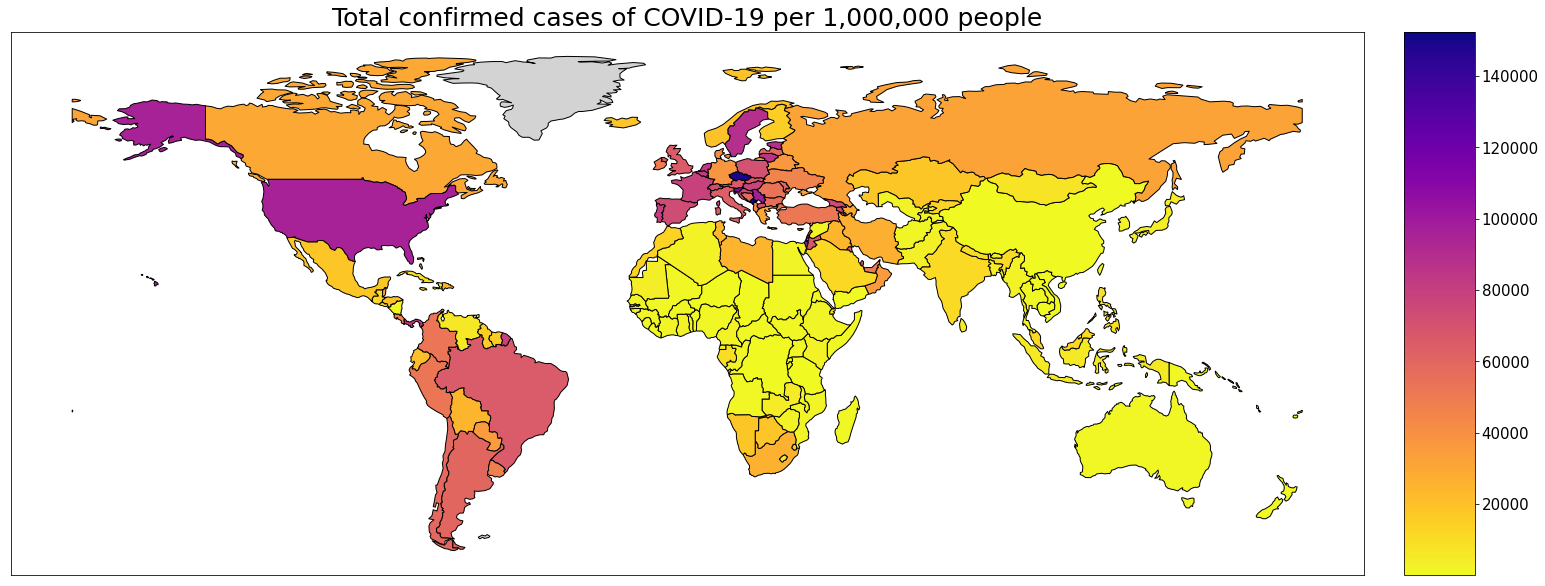

In [3]:
fig, ax = plt.subplots(1, 1,figsize=(60,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

tot_cases_map.plot(column ='total_cases_per_million',
                   ax=ax, legend=True, cax = cax,
                   cmap = 'plasma_r',
                   missing_kwds={'color': "lightgrey"},
                   edgecolor='k')

ax.set_title('Total confirmed cases of COVID-19 per 1,000,000 people', fontsize = 25)
fig.axes[1].tick_params(labelsize=15)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

This map shows the number of total confirmed cases of COVID-19 per 1,000,000 people in each country. Differences in the population size between different countries are often large, hence it is insightful to compare the number of confirmed cases per million people.
The first case of COVID-19 was detected in Wuhan, China, on 31 December 2019. However, Almost one year and a half later, the Americas and Europe are the two leading regions for total cases relative to the size of their populations, with more than 60 million and 50 million cases respectively. Conversely, Oceania and Africa are the two continents that reported the least total amount of cases, approximately 3 million each. These huge discrepancies in the degree of spread of the virus between regions might be caused by plenty of reasons, including demographic, economic, social and geographical factors.

The other important statistic that can help us grasp the magnitude of this virus human cost is how many victims it has made. What we know is the number of confirmed deaths due to COVID-19 to date. However, limited testing and challenges in the attribution of the cause of death mean that the number of confirmed deaths may not be an accurate count of the actual number of deaths from COVID-19.

In [477]:
afr = covid[['date','new_deaths_smoothed']][covid['continent']== 'Africa']
afr = afr.groupby('date').mean().rename(columns = {"new_deaths_smoothed":"Africa"})

asia = covid[['date','new_deaths_smoothed']][covid['continent'] == 'Asia']
asia = asia.groupby('date').mean().rename(columns = {"new_deaths_smoothed":"Asia"})

oce = covid[['date','new_deaths_smoothed']][covid['continent']== 'Oceania']
oce = oce.groupby('date').mean().rename(columns = {"new_deaths_smoothed":"Oceania"})
oce = oce.drop(oce[oce['Oceania'] < 0].index)

northAm = covid[['date','new_deaths_smoothed']][covid['continent']== 'North America']
northAm = northAm.groupby('date').mean().rename(columns = {"new_deaths_smoothed":"North America"})

southAm = covid[['date','new_deaths_smoothed']][covid['continent']== 'South America']
southAm = southAm.groupby('date').mean().rename(columns = {"new_deaths_smoothed":"South America"})

eu = covid[['date','new_deaths_smoothed']][covid['continent'] == 'Europe']
eu = eu.groupby('date').mean().rename(columns = {"new_deaths_smoothed":"Europe"})

In [481]:
conts = pd.concat([afr,oce,asia,northAm,southAm,eu], axis = 1)
conts = conts.divide(conts.sum(axis=1), axis=0)*100
conts.head()

,Africa,Oceania,Asia,North America,South America,Europe
2020-02-07,NaN,0.0,100.0,0.0,NaN,0.0
2020-02-08,NaN,0.0,100.0,0.0,NaN,0.0
2020-02-09,NaN,0.0,100.0,0.0,NaN,0.0
2020-02-10,NaN,0.0,100.0,0.0,NaN,0.0
2020-02-11,NaN,0.0,100.0,0.0,NaN,0.0


In [482]:
conts.index = pd.to_datetime(conts.index)

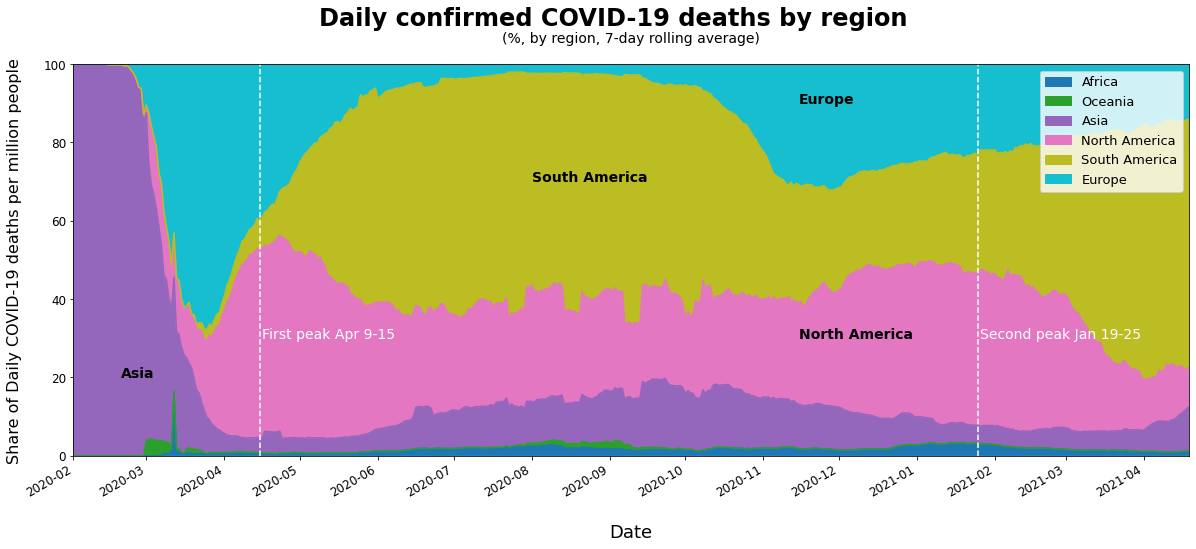

In [485]:
ax = conts.plot.area(figsize = (20,8), cmap='tab10')

plt.suptitle("Daily confirmed COVID-19 deaths by region", fontsize = 24, weight = 'bold')
plt.title('(%, by region, 7-day rolling average)\n', fontsize = 14)
ax.set_xlabel('\nDate', size = 18)
ax.set_ylabel('Share of Daily COVID-19 deaths per million people\n', size = 16)


fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlim('2020-02','2021-04-19')
plt.xticks(size = 12)

ax.axvline(x='2020-04-15', c = 'white', ls='--')
ax.text('2020-04-16',30, 'First peak Apr 9-15', c = 'w', fontsize = 14)
ax.axvline(x='2021-01-25', c = 'white', ls='--')
ax.text('2021-01-26',30, 'Second peak Jan 19-25', c = 'w', fontsize = 14)
ax.text('2020-02-20',20, 'Asia', c = 'k', fontsize = 14,weight = 'bold')
ax.text('2020-11-15',30, 'North America', c = 'k', fontsize = 14,weight = 'bold')
ax.text('2020-11-15',90, 'Europe', c = 'k', fontsize = 14,weight = 'bold')
ax.text('2020-08-01',70, 'South America', c = 'k', fontsize = 14,weight = 'bold')

plt.yticks(size = 12)
ax.set_ylim(0,100)

plt.legend(fontsize = 13, loc='upper right')

plt.show()

The graph shows the share of daily confirmed COVID-19 deaths per million people (7-day rolling average) for each continent. Again, differences in the population size between regions are often large, and because of this, it can be insightful to know how the number of confirmed deaths in a continent compares to its population. Europe’s average count of coronavirus-related deaths overtook Asia’s in early March 2020, but from mid-April, the focus shifted to the USA, where the number of deaths has remained consistently high until March 2021. South America became the epicentre of the pandemic in the summer of 2020, with the region accounting for almost half of deaths each day. However, the surge in Europe since the autumn means Covid-19 remains a global pandemic. Unsurprisingly, the share of Coronavirus deaths in Africa and Oceania have remained low for the whole period. 

As we said, no country knows the total number of people infected with COVID-19. All we know is the infection status of those who have been tested. This means that the counts of confirmed cases and confirmed COVID-19 deaths depend on how much a country actually tests its population. Hence, to interpret any data we first need to know how much testing for COVID-19 the country does. For some countries, the amount of testing conducted can be restricted by economic reasons. We could plot a measure of the wealth of a country such as GDP per capita against the number of tests that the country carried out to partly explain the large discrepancies in cases and deaths between regions found above.

In [486]:
gdp_tes = covid[['continent','location','total_tests_per_thousand', 'gdp_per_capita']].groupby('location').max()
gdp_tes.head()

,continent,total_tests_per_thousand,gdp_per_capita
location,,,
Afghanistan,Asia,NaN,1803.987
Africa,NaN,NaN,NaN
Albania,Europe,200.658,11803.431
Algeria,Africa,NaN,13913.839
Andorra,Europe,2249.259,NaN


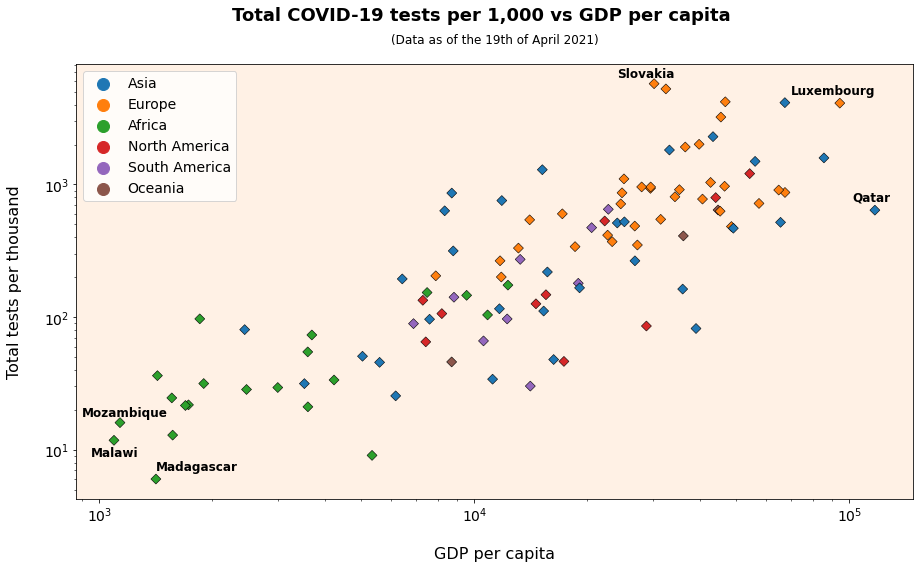

In [488]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()

sns.scatterplot(x = "gdp_per_capita", y = "total_tests_per_thousand", hue = "continent", data = gdp_tes, s = 50,
                marker = 'D', edgecolor = 'k', palette = 'tab10', ax = ax)

plt.xscale('log')
plt.yscale('log')
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.xlabel('\nGDP per capita', fontsize = 16)
plt.ylabel('Total tests per thousand\n', fontsize = 16)
plt.suptitle('Total COVID-19 tests per 1,000 vs GDP per capita', fontsize = 18, weight = 'bold')
plt.title('(Data as of the 19th of April 2021)\n', fontsize = 12)
plt.text(102000,760,'Qatar',size = 12, weight = 'bold')
plt.text(24000,6500,'Slovakia',size = 12, weight = 'bold')
plt.text(70000,4800,'Luxembourg',size = 12, weight = 'bold')
plt.text(950, 9,'Malawi',size = 12, weight = 'bold')
plt.text(900,18,'Mozambique',size = 12, weight = 'bold')
plt.text(1416.440,7,'Madagascar',size = 12, weight = 'bold')
plt.legend(fontsize = 14, markerscale = 2, facecolor = 'w')

ax.set_facecolor("#FFF1E5")
plt.show();

As we expected we found a positive correlation between GDP per capita and total COVID-19 tests per 1,000 people. Therefore, richer countries, in general, have done more testing compared to poorer countries.
The differences in the extent of testing between rich and poor countries are large. While poorer countries such as Madagascar, Mozambique and Malawi have done only a few tests per thousand people, richer countries like Luxembourg and Qatar have done hundreds of tests per thousand people. This helps explain to some extent some of the trends for Coronavirus cases and deaths, especially for some African and Asian countries that have low GDP, low testing and consequently low Covid-related figures. However, there are rich countries like Australia or the Maldive that have high testing numbers but still reported extremely low cases and deaths statistics compared to other countries.

Another important factor to consider for interpreting Covid-19 spreads is climate. Seasonality is a long-recognized attribute of many viral infections of humans. Several studies have shown that COVID-19 growth rates peaked in temperate zones in the Northern Hemisphere during the outbreak period, while they were lower in hot and tropical zones.

In [489]:
temp_map = pd.read_excel("/Users/adrianogiunta/Desktop/Data Science in Economics/Project Info and Data-20210329/data/Countries temperatures1.xlsx")
temp_map = temp_map.rename(columns = {"Average yearly temperature":"avg_temp"})
temp_map = (covid.merge(temp_map, left_on = 'location', right_on='Country Name')
            [['location','iso_code','avg_temp','total_cases_per_million']].groupby('location').max())
temp_map['iso_code'] = temp_map['iso_code'].replace('COG','COD')

temp_map = gdf.merge(temp_map, left_on = 'country_code', right_on = 'iso_code')

temp_map.head()

,country,country_code,geometry,iso_code,avg_temp,total_cases_per_million
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,24.40,80.317
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,22.35,8.521
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,-5.35,30194.114
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,8.55,95884.321
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,6.40,18328.027


In [495]:
centroids = temp_map.copy()
centroids.geometry = temp_map.centroid
centroids.head()

,country,country_code,geometry,iso_code,avg_temp,total_cases_per_million
0,Fiji,FJI,POINT (163.85316 -17.31631),FJI,24.40,80.317
1,United Republic of Tanzania,TZA,POINT (34.75299 -6.25773),TZA,22.35,8.521
2,Canada,CAN,POINT (-98.14238 61.46908),CAN,-5.35,30194.114
3,United States of America,USA,POINT (-112.59944 45.70563),USA,8.55,95884.321
4,Kazakhstan,KAZ,POINT (67.28461 48.19166),KAZ,6.40,18328.027


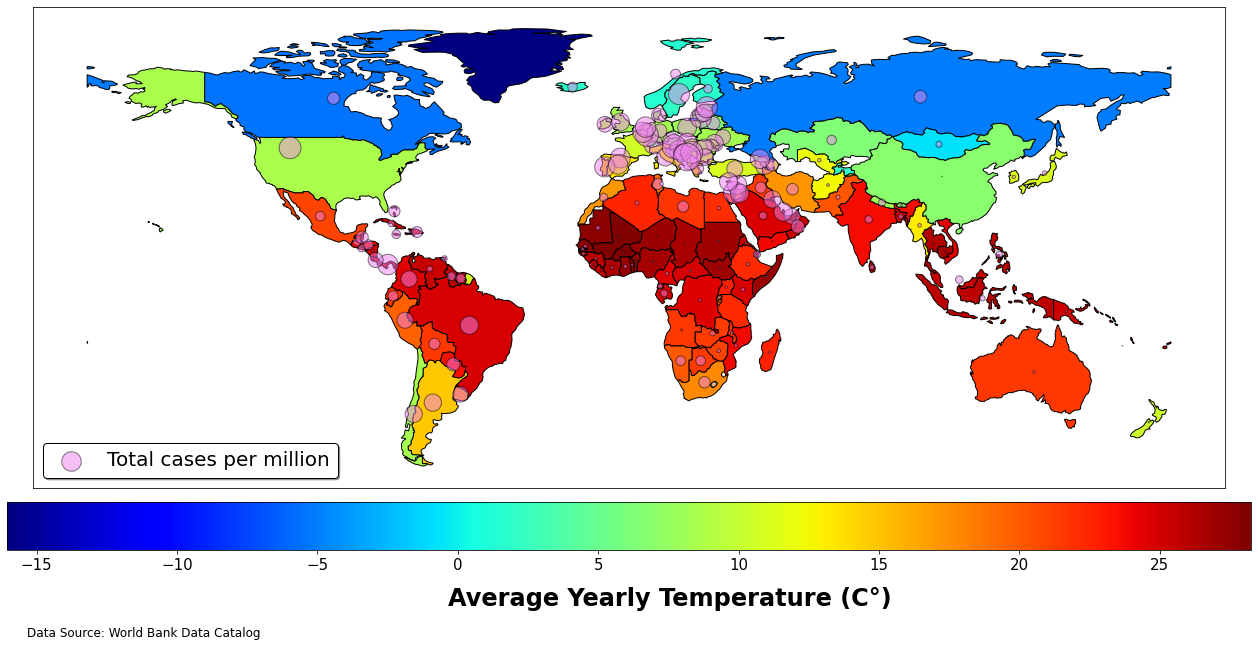

In [498]:
fig, ax = plt.subplots(1, 1,figsize=(60,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="10%", pad=0.2)
temp_map.plot(column ='avg_temp', legend=True, cmap = 'jet', missing_kwds = {"color":"white"}, 
          legend_kwds={'orientation': "horizontal"}, edgecolor='k', ax=ax, cax = cax)

centroids.plot(markersize = temp_map['total_cases_per_million']/200, c = 'violet', edgecolor='k',ax = ax,
               alpha=0.5, label = 'Total cases per million')

ax.legend(fontsize = 20, loc = 'lower left', edgecolor = 'k',shadow = True)
ax.text(-60,-100,'Average Yearly Temperature (C°)',size = 24,weight = 'bold')
ax.text(-200,-110,'Data Source: World Bank Data Catalog',size = 12)
fig.axes[1].tick_params(labelsize=15)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

The map shows exactly our hypothesis that COVID-19 cases are lower in zones with higher temperatures. We can see that total cases relative to population, displayed in the map by the size of the pink circles, are much higher in the northern hemisphere, particularly in Europe and in the US, where average yearly temperatures are between 0 and 10 C°, and much lower in the southern hemisphere, especially in Africa and in Oceania, where average yearly temperatures are between 15 and 25 C°. Nevertheless, we can notice some exceptions such as Latin American countries where cases are high despite having tropical climates or countries like Russia and Canada which have low cases regardless of their polar climates. Therefore, climate, like wealth can describe part of the variation in COVID-19 data between countries, but it also has some flaws.

For now, we have shown some of the possible causes of the different distribution of COVID-19 cases around the world, but what are the factors that made this virus more deadly in specific countries and less in others? Numerous studies have investigated this issue and the majority of them have found that COVID-19-related deaths were mostly associated with being male, presence of other diseases such as diabetes or asthma and greater age. We will start by examining the latter one since it might be the one that best describes the differences in countries COVID-19 deaths.

In [501]:
old = covid[['continent','location','aged_65_older','total_deaths_per_million','total_cases_per_million']]
old = old.groupby('location').max().rename(
    columns = {"continent":"Continent","total_cases_per_million":"Total Cases per Million"})
old.sort_values('aged_65_older', ascending = True)

,Continent,aged_65_older,total_deaths_per_million,Total Cases per Million
location,,,,
United Arab Emirates,Asia,1.144,157.324,50448.617
Qatar,Asia,1.307,133.978,68542.828
Uganda,Africa,2.168,7.411,905.009
Gambia,Africa,2.339,70.345,2366.899
Kuwait,Asia,2.345,340.939,60529.958
...,...,...,...,...
South America,NaN,NaN,1452.845,54487.240
Syria,Asia,NaN,83.197,1215.897
Taiwan,Asia,NaN,0.462,45.178


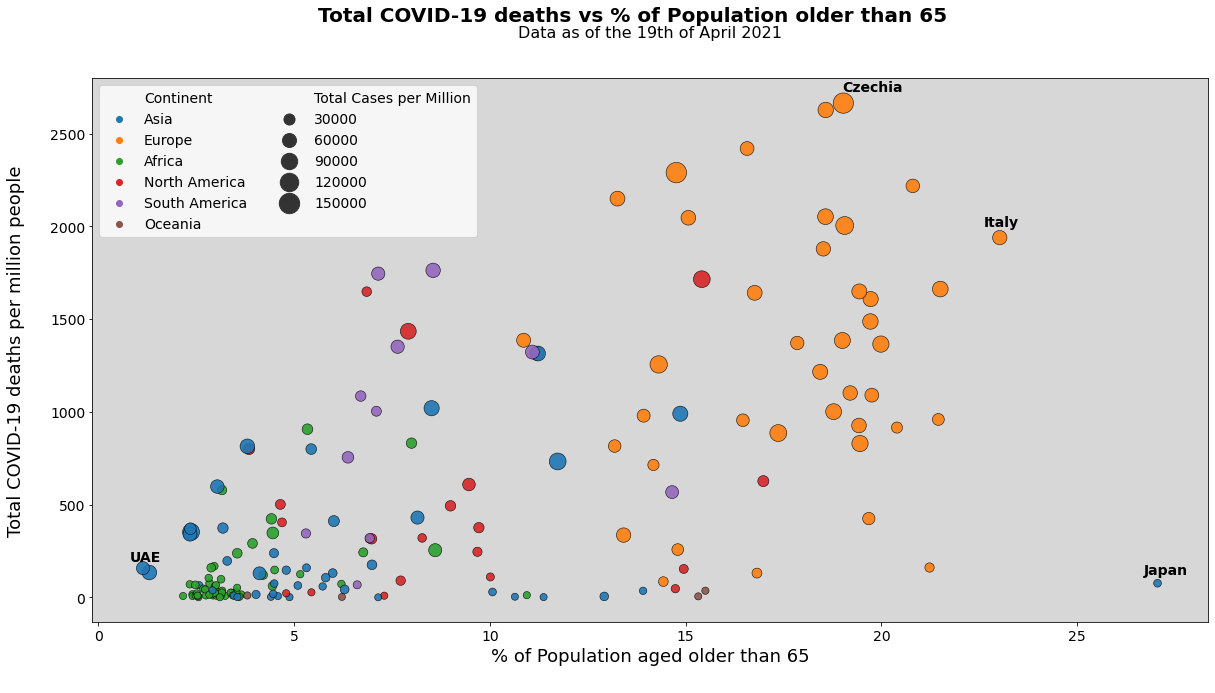

In [502]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

sns.scatterplot(x = "aged_65_older", y = "total_deaths_per_million", hue = "Continent", data = old,
                marker = 'o', edgecolor = 'k', palette = 'tab10', alpha = 0.9,
                size = 'Total Cases per Million', sizes =(50,450))

plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel('% of Population aged older than 65\n', fontsize = 18)
plt.ylabel('Total COVID-19 deaths per million people\n', fontsize = 18)
plt.suptitle('Total COVID-19 deaths vs % of Population older than 65', fontsize = 20, weight = 'bold')
plt.title('Data as of the 19th of April 2021\n\n', fontsize = 16)
plt.text(0.8,195,'UAE',size = 14, weight = 'bold')
plt.text(26.7,125,'Japan',size = 14, weight = 'bold')
plt.text(19,2730,'Czechia',size = 14, weight = 'bold')
plt.text(22.6,2000,'Italy',size = 14, weight = 'bold')
plt.legend(fontsize = 14, ncol = 2)

ax.set_facecolor("#D7D7D7")
plt.show();

This scatterplot predictably describes a positive correlation between the share of the population that is 65 years and older and total deaths attributed to COVID-19 per million people. We can also see that the nations that have the highest shares of elderly people are mainly European and North American, while the ones that have lower proportions of elders are mostly African and Asian. This helps partially explain why countries with an ageing population like Italy, Czech Republic and Spain reported much higher mortality rates than those countries with a relatively younger population.  Once again, we observe some outliers, like Japan which have the highest share of elderly people in the world but has managed to keep COVID-19 deaths quite low or like most South American countries that despite their relatively young population have reported a high number of COVID-19 deaths.

For these countries, there must have been other circumstances that played a role in the number of deaths they reported. For instance, we could look at the frequency of serious diseases in different regions and check whether countries with a greater prevalence of sick people also reported higher total COVID-19 deaths. We can also check which countries have the highest share of smokers in their population and see if that is correlated with their Coronavirus mortaility rates. 

In [343]:
smok_fem = covid[['continent','location','female_smokers']].groupby('location').max()
smok_fem = smok_fem.sort_values('female_smokers', ascending = False).head(15)
smok_fem

,continent,female_smokers
location,,
Montenegro,Europe,44.0
Nauru,Oceania,43.0
Serbia,Europe,37.7
Greece,Europe,35.3
Croatia,Europe,34.3
Chile,South America,34.2
Czechia,Europe,30.5
Bosnia and Herzegovina,Europe,30.2
Bulgaria,Europe,30.1


In [179]:
smok_mal = covid[['continent','location','male_smokers']].groupby('location').max()
smok_mal = smok_mal.sort_values('male_smokers', ascending = False).head(15)
smok_mal

,continent,male_smokers
location,,
Timor,Asia,78.1
Indonesia,Asia,76.1
Tunisia,Africa,65.8
Russia,Europe,58.3
Georgia,Asia,55.5
Maldives,Asia,55.0
Lesotho,Africa,53.9
Cuba,North America,53.3
Cyprus,Europe,52.7


In [503]:
ill = pd.read_csv("/Users/adrianogiunta/Desktop/Data Science in Economics/Project Info and Data-20210329/data/Data_Extract_From_World_Development_Indicators/Diseases.csv")

In [504]:
diab = ill[ill['Series Name'] == 'Diabetes prevalence (% of population ages 20 to 79)']
diab = diab.drop(['Country Code','Series Name','Series Code','2017 [YR2017]','2018 [YR2018]'], axis = 1)
diab = diab.rename(columns = {'Country Name':'country','2019 [YR2019]':'inc_diab'})
diab = diab.astype({'inc_diab': 'float64'})
diab = diab.set_index('country')
diab

,inc_diab
country,
North America,10.461405
Latin America & Caribbean,9.694271
Europe & Central Asia,6.686884
Central Europe and the Baltics,6.295912
Middle East & North Africa,11.373884
Sub-Saharan Africa,5.359440
East Asia & Pacific,8.202553
South Asia,11.237926


In [505]:
mal = ill[ill['Series Name'] == 'Incidence of malaria (per 1,000 population at risk)']
mal = mal.drop(['Country Code','Series Name','Series Code','2017 [YR2017]','2019 [YR2019]'], axis = 1)
mal = mal.replace('..',np.nan).rename(columns = {'Country Name':'country','2018 [YR2018]':'inc_mal'})
mal = mal.astype({'inc_mal': 'float64'})
mal = mal.set_index('country')
mal

,inc_mal
country,
North America,NaN
Latin America & Caribbean,6.735049
Europe & Central Asia,NaN
Central Europe and the Baltics,NaN
Middle East & North Africa,4.427398
Sub-Saharan Africa,219.127334
East Asia & Pacific,2.883253
South Asia,5.410302


In [506]:
tub = ill[ill['Series Name'] == 'Incidence of tuberculosis (per 100,000 people)']
tub = tub.drop(['Country Code','Series Name','Series Code','2017 [YR2017]','2018 [YR2018]'], axis = 1)
tub = tub.replace('..',np.nan).rename(columns = {'Country Name':'country','2019 [YR2019]':'inc_tub'})
tub = tub.astype({'inc_tub': 'float64'})
tub = tub.set_index('country')
tub

,inc_tub
country,
North America,3.2
Latin America & Caribbean,43.0
Europe & Central Asia,27.0
Central Europe and the Baltics,NaN
Middle East & North Africa,30.0
Sub-Saharan Africa,226.0
East Asia & Pacific,130.0
South Asia,203.0


In [507]:
diseases = pd.concat([diab, mal, tub], axis=1)
diseases

,inc_diab,inc_mal,inc_tub
country,,,
North America,10.461405,NaN,3.2
Latin America & Caribbean,9.694271,6.735049,43.0
Europe & Central Asia,6.686884,NaN,27.0
Central Europe and the Baltics,6.295912,NaN,NaN
Middle East & North Africa,11.373884,4.427398,30.0
Sub-Saharan Africa,5.359440,219.127334,226.0
East Asia & Pacific,8.202553,2.883253,130.0
South Asia,11.237926,5.410302,203.0


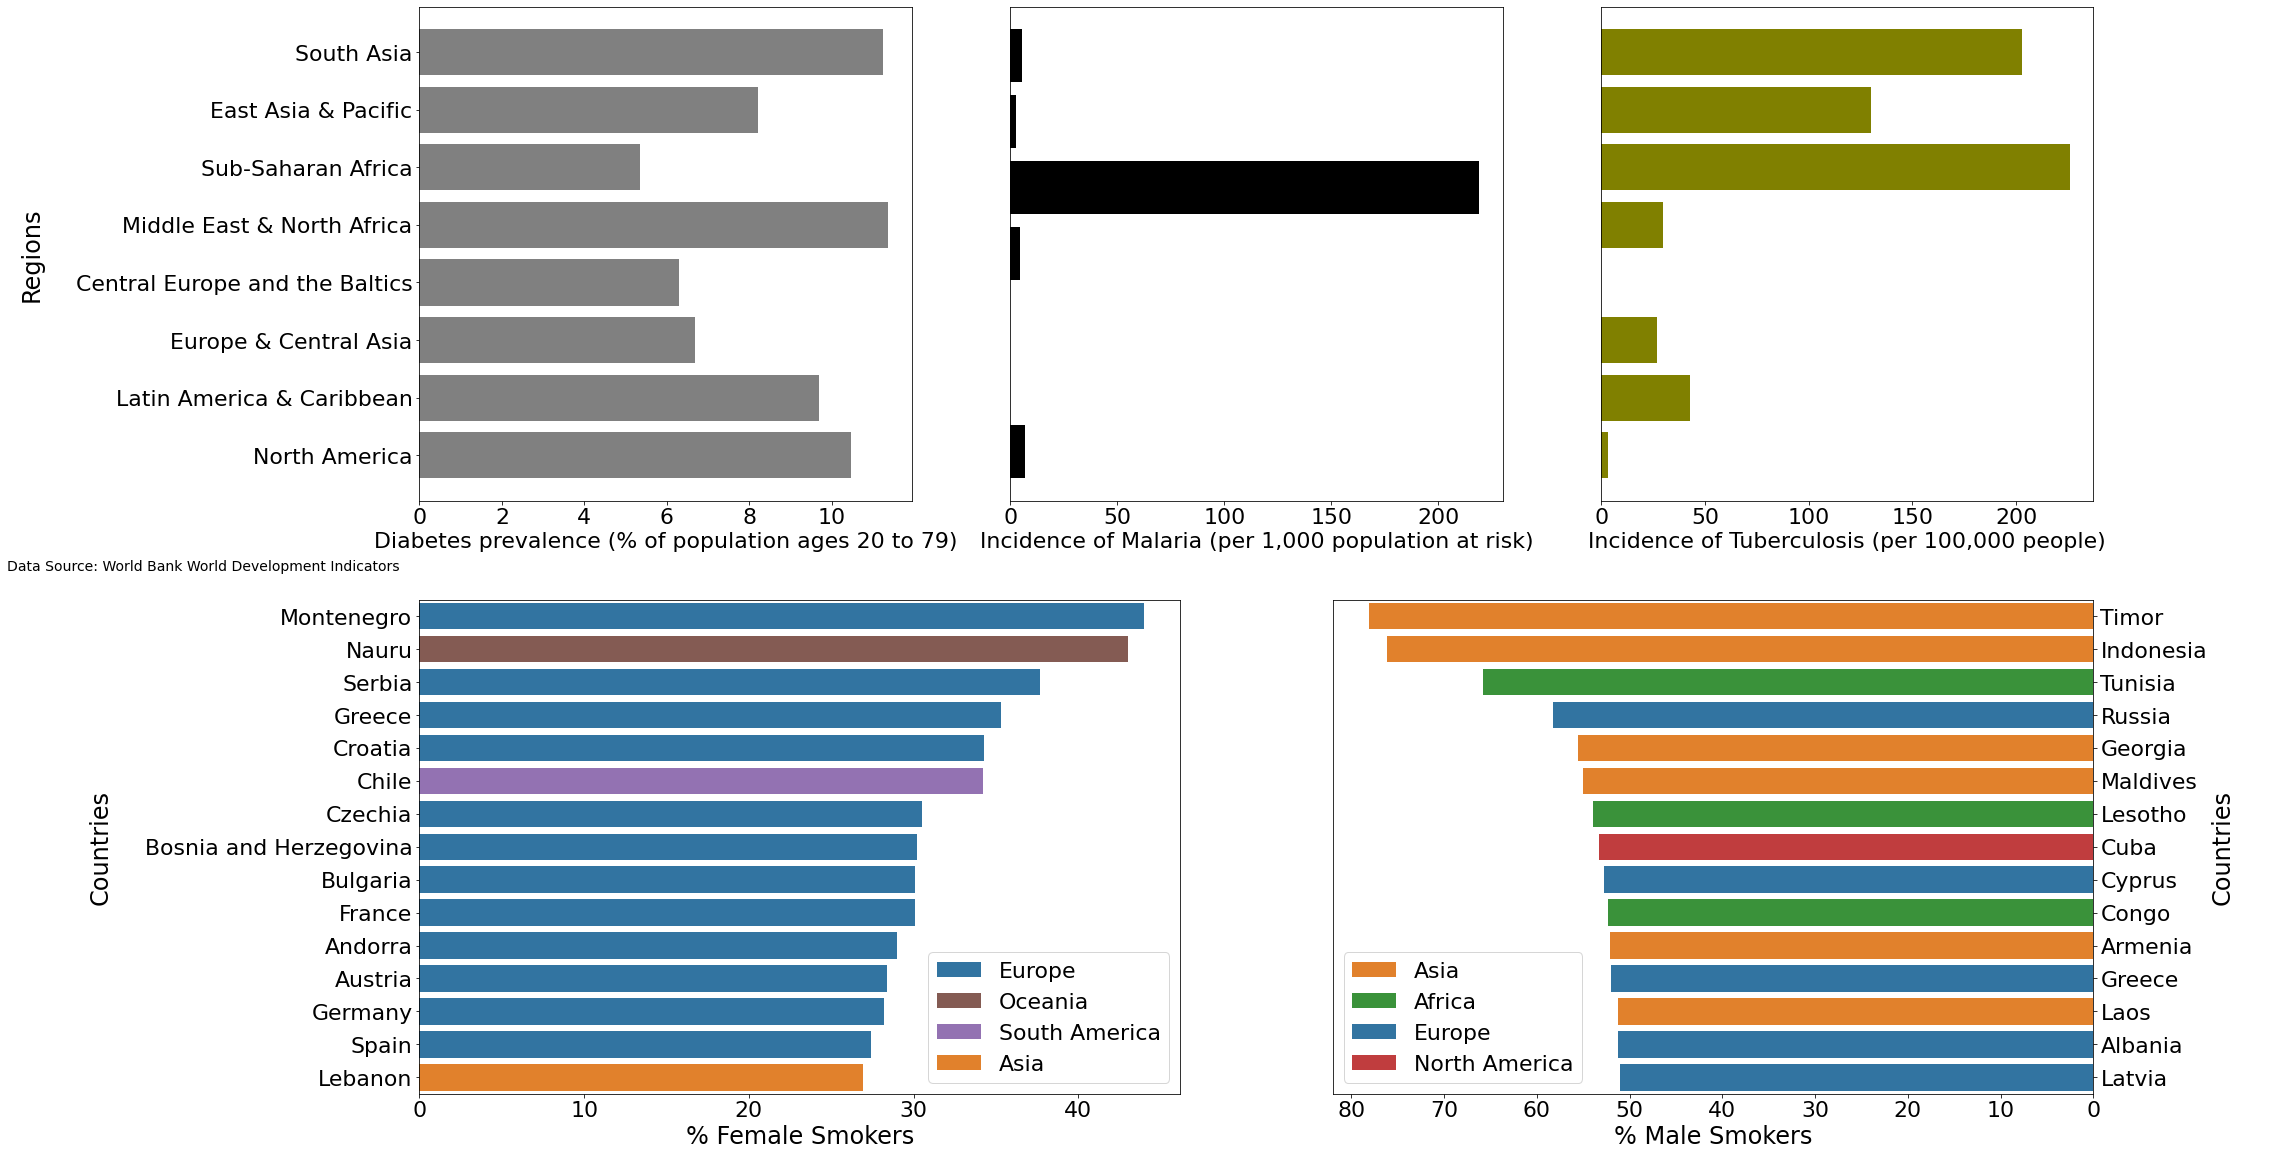

In [508]:
fig = plt.figure(figsize=(30,20))

ax1 = plt.subplot(2, 3, 1)
ax1.barh(diseases.index,diseases.inc_diab, color = 'grey', height = 0.8)
ax1.set_ylabel('Regions\n', fontsize = 24)
ax1.set_xlabel('Diabetes prevalence (% of population ages 20 to 79)', fontsize = 22)
plt.yticks(size = 22)
plt.xticks(size = 22)
ax1.text(-10,-2,'Data Source: World Bank World Development Indicators', fontsize = 14)

ax2 = plt.subplot(2, 3, 2)
ax2.barh(diseases.index,diseases.inc_mal, color = 'black', height = 0.8)
ax2.set_xlabel('Incidence of Malaria (per 1,000 population at risk)', fontsize = 22)
ax2.axes.yaxis.set_visible(False)
plt.xticks(size = 22)

ax3 = plt.subplot(2, 3, 3)
ax3.barh(diseases.index,diseases.inc_tub, color = 'olive', height = 0.8)
ax3.set_xlabel('Incidence of Tuberculosis (per 100,000 people)', fontsize = 22)
ax3.axes.yaxis.set_visible(False)
plt.xticks(size = 22)

continents = ['Europe', 'Asia', 'Africa', 'North America', 'South America', 'Oceania']
palette_colors = sns.color_palette('tab10')
palette_dict = {continent: color for continent, color in zip(continents, palette_colors)}

ax4 = plt.subplot(2, 2, 3)
sns.barplot(x = smok_fem.female_smokers, y = smok_fem.index , hue='continent', data = smok_fem, ax = ax4,
            dodge = False, palette=palette_dict)
ax4.set_xlabel('% Female Smokers', fontsize = 24)
ax4.set_ylabel('Countries\n', fontsize = 24)
ax4.legend(fontsize = 22, markerscale = 2, facecolor = 'w', loc='lower right')
plt.yticks(size = 22)
plt.xticks(size = 22)

ax5 = plt.subplot(2, 2, 4)
sns.barplot(x = smok_mal.male_smokers, y = smok_mal.index , hue = 'continent', data = smok_mal,
            ax = ax5, dodge = False, palette = palette_dict)
ax5.invert_xaxis()
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")
ax5.set_xlabel('% Male Smokers', fontsize = 24)
ax5.set_ylabel('Countries\n', fontsize = 24)
ax5.legend(fontsize = 22, facecolor = 'w', loc='lower left')
plt.yticks(size = 22)
plt.xticks(size = 22)

plt.show()

The first plot shows measures of incidence of three major diseases that have been associated with higher mortality risk from COVID-19 for eight regions of the world. The regions with the highest share of Diabetes prevalence are South Asia, Middle East & North Africa and the Americas. The first two had some of the lowest Coronavirus mortality rates while the latter had the highest one. Incidence of Malaria is high only in Sub-Saharan Africa, which, had low COVID-19 deaths and hence it is more difficult to prove that it correlates with it. Tuberculosis is particularly prevalent in South-East Asia and Sub-Saharan Africa, which, again, have reported relatively low COVID-19 Deaths. This means that the prevalence of these three diseases might not have been too influential in determining how deadly the virus has been in one country. The other variable examined here is the share of the population of female and male smokers. We notice that the countries with more female smokers are mainly European with Montenegro, Serbia and Greece having more than 35% of women who smoke each. The countries with more male smokers are Asian and European with Timor and Indonesia counting an incredibly high 75% men who smoke. Since Europe and these particular Asian countries have reported quite high Coronavirus mortality rates we could say that smokers might be more affected by COVID-19 than non-smokers.

## Conclusion

In summary, we have examined total confirmed cases of COVID-19 per 1,000,000 people in each country and shown that the hardest-hit countries are mainly European and American. We have also shown the share of daily confirmed COVID-19 deaths per million people for each continent and see that Europe overcame Asia in early March 2020, but from April, the focus shifted first to North America and then to Latin America that became the epicentre of the pandemic in the summer of 2020. We aimed at finding factors that might be associated with these two variables to try to explain why some countries/regions have been more affected by COVID-19 than others. We have found that there is a positive correlation between GDP per capita and total COVID-19 tests per 1,000 people, which led us to the conclusion that some countries (mostly African) have reported low cases possibly because they did not test enough, hence the number of actual cases may have been much higher than those detected. Then, we have shown that the virus infection might be easier at lower temperatures, given that regions with warmer climates like Oceania and Africa reported lower cases than Europe and North America which have cooler average temperatures. Further, we have illustrated a positive relationship between the share of the population that is 65 years and older and total deaths attributed to COVID-19 per million people and stated that the virus has been more deadly in Europe and the USA probably because they have a larger share of elderly people. Finally, we tried to associate COVID-19 mortality rates with the incidence of serious diseases like Diabetes, Malaria and Tuberculosis. However, apart from the Americas we did not find a strong case for our thesis since those regions with a high prevalence of these three diseases, namely Africa and South-East Asia, had low Coronavirus deaths. On the other hand, we have found some relation between the share of smokers within a country and its COVID-19 total deaths.

All of these tests have revealed some leaks and as it is well known in statistics, correlation does not mean causation, so we have to be careful in interpreting the results. Nevertheless, with the help of data, we might have been able to partially explain what caused the diverse distribution of COVID-19 cases and deaths in the world.